In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
df = pd.read_csv('stage3.csv')

In [4]:
df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [5]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [6]:
df = df.drop(['incident_url', 'source_url', 'incident_url_fields_missing', 'sources', 'notes', 'address', 'participant_name', 'congressional_district','state_house_district', 'state_senate_district', 'latitude','longitude'], axis=1)

In [7]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,location_description,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...


In [8]:
df['participant_gender'] =  df['participant_gender'].str.replace('[^A-Za-z\\|]+', '')
df['participant_status'] =  df['participant_status'].str.replace('[^A-Za-z\\|]+', '')
df['participant_age_group'] =  df['participant_age_group'].str.replace('[^A-Za-z\\|]+', '')
df['participant_type'] =  df['participant_type'].str.replace('[^A-Za-z\\|]+', '')

In [9]:
df['gender_list'] = df.participant_gender.str.split('\\|\\|')
df['status_list'] = df.participant_status.str.split('\\|\\|')
df['age_list'] = df.participant_age_group.str.split('\\|\\|')
df['type_list'] = df.participant_type.str.split('\\|\\|')

In [10]:
df

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,location_description,...,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,gender_list,status_list,age_list,type_list
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,...,0::20,Adult||Adult||Adult||Adult||Adult,Male||Male||Male||Female,NaN,Arrested||Injured||Injured||Injured||Injured,Victim||Victim||Victim||Victim||SubjectSuspect,"[Male, Male, Male, Female]","[Arrested, Injured, Injured, Injured, Injured]","[Adult, Adult, Adult, Adult, Adult]","[Victim, Victim, Victim, Victim, SubjectSuspect]"
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,0::20,Adult||Adult||Adult||Adult,Male,NaN,Killed||Injured||Injured||Injured,Victim||Victim||Victim||Victim||SubjectSuspect,[Male],"[Killed, Injured, Injured, Injured]","[Adult, Adult, Adult, Adult]","[Victim, Victim, Victim, Victim, SubjectSuspect]"
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,...,0::25||1::31||2::33||3::34||4::33,Adult||Adult||Adult||Adult||Adult,Male||Male||Male||Male||Male,NaN,InjuredUnharmedArrested||UnharmedArrested||Kil...,SubjectSuspect||SubjectSuspect||Victim||Victim...,"[Male, Male, Male, Male, Male]","[InjuredUnharmedArrested, UnharmedArrested, Ki...","[Adult, Adult, Adult, Adult, Adult]","[SubjectSuspect, SubjectSuspect, Victim, Victi..."
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,...,0::29||1::33||2::56||3::33,Adult||Adult||Adult||Adult,Female||Male||Male||Male,NaN,Killed||Killed||Killed||Killed,Victim||Victim||Victim||SubjectSuspect,"[Female, Male, Male, Male]","[Killed, Killed, Killed, Killed]","[Adult, Adult, Adult, Adult]","[Victim, Victim, Victim, SubjectSuspect]"
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,0::18||1::46||2::14||3::47,Adult||Adult||Teen||Adult,Female||Male||Male||Female,3::Family,Injured||Injured||Killed||Killed,Victim||Victim||Victim||SubjectSuspect,"[Female, Male, Male, Female]","[Injured, Injured, Killed, Killed]","[Adult, Adult, Teen, Adult]","[Victim, Victim, Victim, SubjectSuspect]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,0,0,0::Unknown,0::Unknown,Shots Fired - No Injuries,NaN,...,0::25,Adult,Female,NaN,UnharmedArrested,SubjectSuspect,[Female],[UnharmedArrested],[Adult],[SubjectSuspect]
239673,1083139,2018-03-31,Louisiana,Natchitoches,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Ins...",Shop Rite,...,1::21,Adult||Adult,Male||Male,NaN,Killed||UnharmedArrested,Victim||SubjectSuspect,"[Male, Male]","[Killed, UnharmedArrested]","[Adult, Adult]","[Victim, SubjectSuspect]"
239674,1083151,2018-03-31,Louisiana,Gretna,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured,NaN,...,0::21,Adult,Male,NaN,Injured,Victim,[Male],[Injured],[Adult],[Victim]
239675,1082514,2018-03-31,Texas,Houston,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",Vanderbilt Court apartments,...,0::42,Adult,Male,NaN,Killed,Victim,[Male],[Killed],[Adult],[Victim]


In [11]:
df = df[df['gender_list'].notna()]
df = df[df['status_list'].notna()]
df = df[df['age_list'].notna()]
df = df[df['type_list'].notna()]


In [12]:
df = df.drop(['participant_gender','participant_status','participant_age_group','participant_type'], axis=1)

In [13]:
df.isna().sum()

incident_id                      0
date                             0
state                            0
city_or_county                   0
n_killed                         0
n_injured                        0
gun_stolen                   79637
gun_type                     79612
incident_characteristics       232
location_description        158744
n_guns_involved              79612
participant_age              46431
participant_relationship    176944
gender_list                      0
status_list                      0
age_list                         0
type_list                        0
dtype: int64

In [14]:
df['male'] = df['gender_list'].apply(lambda x: x.count('Male'))
df['female'] = df['gender_list'].apply(lambda x: x.count('Female'))

In [15]:
df['Adult'] = df['age_list'].apply(lambda x: x.count('Adult'))
df['Teen'] = df['age_list'].apply(lambda x: x.count('Teen'))
df['Child'] = df['age_list'].apply(lambda x: x.count('Child'))


In [16]:
df['Victim'] = df['type_list'].apply(lambda x: x.count('Victim'))
df['Suspect'] = df['type_list'].apply(lambda x: sum('Suspect' in s in s for s in x))


In [17]:
df['Arrested'] = df['status_list'].apply(lambda x: sum('Arrested' in s in s for s in x))
df['Killed'] = df['status_list'].apply(lambda x:sum('Killed' in s in s for s in x))
df['Injured'] = df['status_list'].apply(lambda x: sum('Injured' in s in s for s in x))



In [18]:
df[['incident_characteristics']]

,incident_characteristics
0,Shot - Wounded/Injured||Mass Shooting (4+ vict...
1,"Shot - Wounded/Injured||Shot - Dead (murder, a..."
2,"Shot - Wounded/Injured||Shot - Dead (murder, a..."
3,"Shot - Dead (murder, accidental, suicide)||Off..."
4,"Shot - Wounded/Injured||Shot - Dead (murder, a..."
...,...
239672,Shots Fired - No Injuries
239673,"Shot - Dead (murder, accidental, suicide)||Ins..."
239674,Shot - Wounded/Injured
239675,"Shot - Dead (murder, accidental, suicide)"


In [19]:
df['incident_characteristics_list'] = df.incident_characteristics.str.split('\\|')
df = df[df['incident_characteristics_list'].notna()]


In [20]:
df['primary_characteristic'] = df['incident_characteristics_list'].apply(lambda x: x[0])
df['secondry_characteristic'] = df['incident_characteristics_list'].apply(lambda x: x[1] if len(x) > 1 else None )

In [21]:
df

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,location_description,...,Teen,Child,Victim,Suspect,Arrested,Killed,Injured,incident_characteristics_list,primary_characteristic,secondry_characteristic
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,...,0,0,4,1,1,0,4,"[Shot - Wounded/Injured, , Mass Shooting (4+ v...",Shot - Wounded/Injured,
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,0,0,4,1,0,1,3,"[Shot - Wounded/Injured, , Shot - Dead (murder...",Shot - Wounded/Injured,
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,...,0,0,3,2,2,1,3,"[Shot - Wounded/Injured, , Shot - Dead (murder...",Shot - Wounded/Injured,
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,...,0,0,3,1,0,4,0,"[Shot - Dead (murder, accidental, suicide), , ...","Shot - Dead (murder, accidental, suicide)",
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,1,0,3,1,0,2,2,"[Shot - Wounded/Injured, , Shot - Dead (murder...",Shot - Wounded/Injured,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,0,0,0::Unknown,0::Unknown,Shots Fired - No Injuries,NaN,...,0,0,0,1,1,0,0,[Shots Fired - No Injuries],Shots Fired - No Injuries,None
239673,1083139,2018-03-31,Louisiana,Natchitoches,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Ins...",Shop Rite,...,0,0,1,1,1,1,0,"[Shot - Dead (murder, accidental, suicide), , ...","Shot - Dead (murder, accidental, suicide)",
239674,1083151,2018-03-31,Louisiana,Gretna,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured,NaN,...,0,0,1,0,0,0,1,[Shot - Wounded/Injured],Shot - Wounded/Injured,None
239675,1082514,2018-03-31,Texas,Houston,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",Vanderbilt Court apartments,...,0,0,1,0,0,1,0,"[Shot - Dead (murder, accidental, suicide)]","Shot - Dead (murder, accidental, suicide)",None


In [22]:
df.primary_characteristic.value_counts()

Shot - Wounded/Injured                                                                                  82571
Shot - Dead (murder, accidental, suicide)                                                               43779
Non-Shooting Incident                                                                                   31765
Shots Fired - No Injuries                                                                               17348
Armed robbery with injury/death and/or evidence of DGU found                                             6319
Institution/Group/Business                                                                               2946
Home Invasion                                                                                            1144
Possession (gun(s) found during commission of other crimes)                                              1084
Drug involvement                                                                                          868
Brandishin

In [23]:
df.secondry_characteristic.value_counts()

                                                                                                        117498
Brandishing/flourishing/open carry/lost/found                                                              201
Officer Involved Incident                                                                                  146
Armed robbery with injury/death and/or evidence of DGU found                                               131
Shot - Dead (murder, accidental, suicide)                                                                  126
Accidental Shooting                                                                                        113
Possession (gun(s) found during commission of other crimes)                                                101
Home Invasion                                                                                               84
Suicide^                                                                                                    82
D

array([[<AxesSubplot:title={'center':'n_killed'}>]], dtype=object)

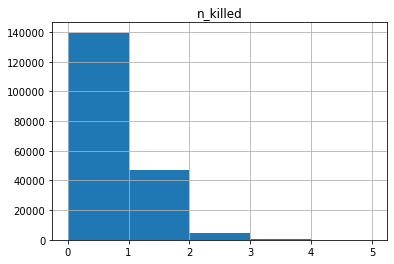

In [24]:
df.hist(column='n_killed', bins=[0,1,2,3,4,5])

In [25]:
df


,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,location_description,...,Teen,Child,Victim,Suspect,Arrested,Killed,Injured,incident_characteristics_list,primary_characteristic,secondry_characteristic
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,...,0,0,4,1,1,0,4,"[Shot - Wounded/Injured, , Mass Shooting (4+ v...",Shot - Wounded/Injured,
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,0,0,4,1,0,1,3,"[Shot - Wounded/Injured, , Shot - Dead (murder...",Shot - Wounded/Injured,
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,...,0,0,3,2,2,1,3,"[Shot - Wounded/Injured, , Shot - Dead (murder...",Shot - Wounded/Injured,
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,...,0,0,3,1,0,4,0,"[Shot - Dead (murder, accidental, suicide), , ...","Shot - Dead (murder, accidental, suicide)",
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,1,0,3,1,0,2,2,"[Shot - Wounded/Injured, , Shot - Dead (murder...",Shot - Wounded/Injured,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,0,0,0::Unknown,0::Unknown,Shots Fired - No Injuries,NaN,...,0,0,0,1,1,0,0,[Shots Fired - No Injuries],Shots Fired - No Injuries,None
239673,1083139,2018-03-31,Louisiana,Natchitoches,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Ins...",Shop Rite,...,0,0,1,1,1,1,0,"[Shot - Dead (murder, accidental, suicide), , ...","Shot - Dead (murder, accidental, suicide)",
239674,1083151,2018-03-31,Louisiana,Gretna,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured,NaN,...,0,0,1,0,0,0,1,[Shot - Wounded/Injured],Shot - Wounded/Injured,None
239675,1082514,2018-03-31,Texas,Houston,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",Vanderbilt Court apartments,...,0,0,1,0,0,1,0,"[Shot - Dead (murder, accidental, suicide)]","Shot - Dead (murder, accidental, suicide)",None


In [52]:
list_features = [df['primary_characteristic'],df['male'],df['female']]

In [62]:

stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['primary_characteristic'],df['n_killed']))
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print( 'primary_characteristic '+'Dependent (reject H0)')
else:
    print('primary_characteristic ' +'Independent (fail to reject H0)')

primary_characteristic Dependent (reject H0)


In [64]:
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['secondry_characteristic'],df['n_killed']))
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print( 'secondry_characteristic '+'Dependent (reject H0)')
else:
    print('secondry_characteristic ' +'Independent (fail to reject H0)')

secondry_characteristic Dependent (reject H0)


In [65]:
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['male'],df['n_killed']))
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print( 'male '+'Dependent (reject H0)')
else:
    print('male ' +'Independent (fail to reject H0)')

male Dependent (reject H0)


In [66]:
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['female'],df['n_killed']))
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print( 'female '+'Dependent (reject H0)')
else:
    print('female ' +'Independent (fail to reject H0)')

female Dependent (reject H0)
